### เรียนรู้ NumPy สำหรับการคำนวณตัวเลข

In [1]:
import numpy as np  # Import ไลบรารี NumPy

# สร้างอาร์เรย์ 1D
arr = np.array([1, 2, 3, 4, 5])
print("1D Array:", arr)

# สร้างอาร์เรย์ 2D (Matrix)
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print("2D Matrix:\n", matrix)

# สร้างอาร์เรย์ที่มีค่า 0 หรือ 1
zeros = np.zeros((3, 3))  # เมทริกซ์ 3x3 ที่มีค่าเป็นศูนย์
ones = np.ones((2, 2))  # เมทริกซ์ 2x2 ที่มีค่าเป็นหนึ่ง

print("Zeros Matrix:\n", zeros)
print("Ones Matrix:\n", ones)


1D Array: [1 2 3 4 5]
2D Matrix:
 [[1 2 3]
 [4 5 6]]
Zeros Matrix:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Ones Matrix:
 [[1. 1.]
 [1. 1.]]


In [4]:
my_matrix = np.arange(2, 18).reshape(4, 4)
print("My 4x4 Matrix:\n", my_matrix)

My 4x4 Matrix:
 [[ 2  3  4  5]
 [ 6  7  8  9]
 [10 11 12 13]
 [14 15 16 17]]


In [5]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# แปลงค่าตัวเลขของ species เป็นชื่อจริง
df['species'] = df['species'].apply(lambda x: iris.target_names[x])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### หากต้องการดูโครงสร้างข้อมูล

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [8]:
print(df.describe()) # สรุปค่าสถิติของข้อมูล

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


### ใช้ Matplotlib & Seaborn ทำ Data Visualization

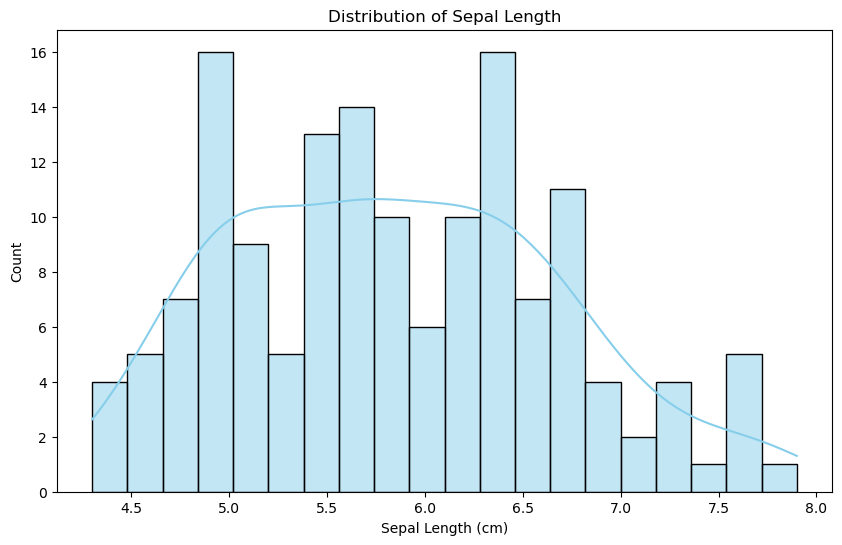

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['sepal length (cm)'],bins=20, kde=True, color='skyblue')

plt.title('Distribution of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Count')
plt.show()

### Classification with Iris Dataset

In [13]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

df['species']=df['species'].apply(lambda x: iris.target_names[x])

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### แบ่งข้อมูลเป็น Training และ Testing

In [14]:
from sklearn.model_selection import train_test_split

# แยก Features (X) และ Target (y)
X = df.drop('species', axis=1)
y= df['species']

# แบ่งข้อมูลเป็น Training และ Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#แสดงขนาดของข้อมูล
print("X_train shape:", X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (120, 4)
X_test shape: (30, 4)


### สร้างโมเดล Classification

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Predicted Complete")

Predicted Complete


### ประเมินผลโมเดล

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#วัดความแม่นยำ
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")  

#แสดงรายงานผลการจำแนก
print("\n Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 1.00

 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



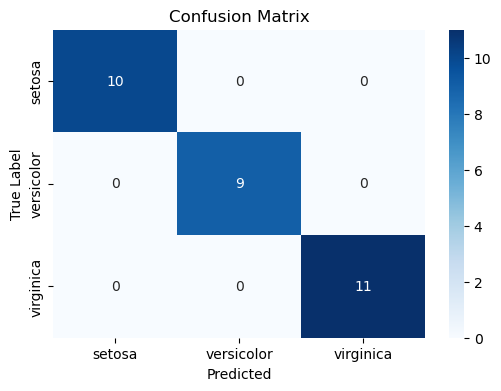

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d",
            xticklabels=iris.target_names, yticklabels=iris.target_names)

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()

### ทดลองให้โมเดลทำนายดอกไม้ใหม่

In [20]:
import pandas as pd

# ตัวอย่างข้อมูลดอกไม้ใหม่ (ใส่เป็น DataFrame พร้อม Feature Names)
new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)

# ทำนายผล
predicted_species = model.predict(new_flower)

print(f"The predicted species is: {predicted_species[0]}")

The predicted species is: setosa


### Export Model

In [1]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# โหลดข้อมูล Iris Dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# แบ่งข้อมูลเป็น Train-Test (80-20)
X = df.drop(columns=["species"])
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# เทรนโมเดลใหม่
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ โมเดลถูกสร้างและ Train สำเร็จ!")

✅ โมเดลถูกสร้างและ Train สำเร็จ!


In [3]:
import joblib

joblib.dump(model, 'iris_model.pkl')

print("🎉 โมเดลถูกบันทึกแล้ว: iris_model.pkl")

🎉 โมเดลถูกบันทึกแล้ว: iris_model.pkl


### โหลดโมเดลกลับมาใช้ (Load Model)

In [5]:
loaded_model = joblib.load("iris_model.pkl")

new_flower = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=X.columns)
predicted_species = loaded_model.predict(new_flower)

print(f"The predicted species is: {predicted_species[0]}")

The predicted species is: 0
